# Introduction

Taxes play an important role for every individual in the economy. The size of the tax payment affects the disposible income, and thus the (possible) consumption level. The government collects taxes in order to finance its expenditures. The literatture has estimated that an increase in the marginal tax rate induces people to work less. This implies that the government cannot set a too high marginal tax rate in order to maximize its revenue. In the end, both workers and the government benefit from an optimal tax system. In this project, we examine the change of behaviour of a worker due to a change in the marginal tax rate. 

In this project, we only consider changes on the intensive margin, i.e. how people adjust their work hours or/and effort due to changes in the marginal tax rate, and not if they change employment status due to a change in the marginal tax rate. Feldstein (1995) argues that taxable income as endogenous variable is better when estimating changes in behaviour due to changes in the marginal tax rate, since taxable income captures changes in hours worked and changes in work effort. We apply the same method as Feldstein (1995) and consider the change in taxable income from changes in the marginal tax rate. 

# Model description

We consider the utility function given by 

$U_i = c_i - \frac{\alpha _i}{1+\frac{1}{\epsilon}} ( \frac{z _i}{ \alpha _i})^ {1+ \frac{1}{\epsilon}}$

where $c_i$ denotes consumption of the individual, while $z_i$ denotes the taxable income of the individual. $\alpha _i$ denotes the potential earnings level of the individual, and $\epsilon$ denotes the elasticity of taxable income with respect to the net-of-tax rate. 

The consumption level is dependent of the taxable income. Thus, we consider the budget constraint given by

$c_i = z_i - T(z_i)$

where $T(z_i)$ is the tax payment. This implies that we assume that the individual uses all of his disposible income on consumption. The tax payment is given by 

$T(z_i) = m*z_i$ 

where $m$ is the tax rate chosen by the government. Since the tax rate is independent of earnings, we consider a proportional tax system.

We want to maximize the utility of the individual subject to his budget constraint, i.e.

$\max\limits_{z_i} U_i=c_i - \frac{\alpha _i}{1+\frac{1}{\epsilon}} ( \frac{z _i}{ \alpha _i})^ {1+ \frac{1}{\epsilon}}$ s.t. $c_i = z_i - T(z_i)$

# Solutions

First, we find the analytical solution. Thus, we find the optimal taxable income of the individual subject to the tax rate. 
Second, we show the graphical solution. Here, we see the optimum of the indifference curve, the budget constraint and the optimum of the individual.

## Analytical solution

We import the `sympy`-package in order to define the variables and parameters. Afterwards, we use the `.init_printing`-function, so the variables are written in a pretty way. Lastly, we define the variables and parameters.

In [2]:
# 1) Import sympy in order to write nice equations.
import sympy as sm

# 2) Define that we want the variables are printed in a pretty way.
sm.init_printing(use_unicode=True)

# 3) Define the different variables and parameters.
U    = sm.symbols('U')
c    = sm.symbols('c')
z    = sm.symbols('z')
eps  = sm.symbols('epsilon')
T_z  = sm.symbols('T(z)')
mtax = sm.symbols('m')
alp  = sm.symbols('alpha')

We define the different functions. In total, we consider three different functions: the utility function, the budget constraint and the tax payment. The last two functions are functions of taxable income. 

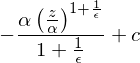

In [3]:
# Define utility function.
utility = c - alp/(1+1/eps)*(z/alp)**(1+1/eps)
utility

In [4]:
# Define budget constraint.
budget_constraint = sm.Eq(c, z - T_z)
budget_constraint

In [5]:
# Define tax payment.
taxpay = sm.Eq(T_z, mtax*z)
taxpay

In the next step, we want to substitute the tax payment into the budget constraint.

In [6]:
# 1) Isolate T_z in the tax payment (this is done already, but to make sure, we run this line of code).
tax_solve = sm.solve(taxpay, T_z)

# 2) Define that we want the tax payment substituted into the budget constraint.
budget_constraint_sub = budget_constraint.subs(T_z, tax_solve[0])

# 3) Ensure that the budget constraint is correct after the substitution. 
budget_constraint_sub


Now, we want to substitute the budget constraint into the utility function. This is done in the same way as before. 

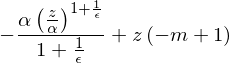

In [7]:
# 1) Isolate c in the budget constraint (this is done already, but to make sure, we run this line of code).
budget_constraint_solve = sm.solve(budget_constraint_sub, c)

# 2) Define that we want the budget constraint substituted into the utility function.
utility_sub = utility.subs(c, budget_constraint_solve[0])

# 3) Ensure that the utility function is correct after the substitution. 
utility_sub

We have concluded that the utility function is defined in the right way. After substitution, the utility function does only depend of the taxable income (and parameters, but these are fixed). 
In order to find the optimal level of taxable income, we differentiate the utility function with respect to taxable income. Afterwards, we isolate for taxable income to derive the optimal level of taxable income ($z^*$). 

In [8]:
# 1) Define that we want to calculate the derivate of the utility function with respect to taxable income.
foc = sm.diff(utility_sub, z)

# 2) Define that we want to isolate for taxable income to derive z*.
z_star = sm.solve(foc, z)

# 3) Define the optimal level of taxable income as a Python-function. 
z_star_func = sm.lambdify((mtax, alp, eps), z_star)

# 4) Examine the optimal level of taxable income.
z_star




We note that the optimal level of taxable income depends on the marginal tax rate, the potential earnings and the elasticity of taxable income with respect to the net-of-tax rate. In the special case where the individual face no taxes, i.e. where $m=0$, his taxable income will equal his potential earnings ($z _i ^* = \alpha _i$). 
Furthermore, we note that the taxable income is lowered more due to an increase in the tax rate when the elasticity of taxable income is high. 

## Graphical solution


We can show how people change behaviour due to a change in the marginal tax rate. As noticed before, the marginal tax rate and the elasticity of taxable income affect how much people deviate from their potential earnings. This can be shown in a graph where one can examine the changes in taxable income when the parameters are changed. In order to do that, we need to define different functions.

First, we import the `numpy`-package. Afterwards, we define a function for the budget constraint and the utility function. In the utility function, we insert the solution given by $z^*$ instead of $z$. We are then possible to determine the optimal consumption level which is a function of the optimal taxable income. Finally, we isolate consumption and keep utility fixed in order to draw an indifference curve .

In [9]:
# 1) Import the numpy-package.
import numpy as np

# 2) Define the budget constraint.
def budget_con_fuc(m):
    return (1-m)*z
budget_con = np.array(range(2))

# 3) Define the utility function. 
def value_of_choice(alpha, epsilon, m):
    
    # The resulting utility is
    utility_f = (1-m)*(alpha*(1-m)**epsilon) - alpha/(1+1/epsilon)*(alpha*(1-m)**epsilon/alpha)**(1+1/epsilon)   
    return utility_f

# 3) Define the consumption level determined by the optimal taxable income.
def y(budget_con, m): 
    return budget_con*(1-m)

# 4) Define the consumption level as a function of the fixed utility and taxable income.
def f(budget_con, alpha, epsilon, m):
    u = value_of_choice(alpha, epsilon, m)
    return u + alpha/(1+1/epsilon)*(budget_con/alpha)**(1+1/epsilon)

We want to plot the utility function, the budget constraint and the optimal taxable income. The optimal taxable income is given by the point where the budget constraint is tangent to the utility function (which is marked with a bullet on the graph). 

In order to do so, we import the `matplotlib`-package in order to plot the graphs. Furthermore, we import the `ipywidgets`-package in order to generate sliders. 

In [10]:
# Import packages in order to plot the graph and generate sliders. 
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [11]:
# 1) Define a custom value of the parameters of interest.
tax     = 0.4
epsilon = 1
alpha   = 1

# 2) Generate the graph.     
def graph(alpha, epsilon, tax):
    plt.figure(figsize=(12,6))
    budget_con = np.arange(0.0, alpha, 1)
    plt.plot(budget_con, f(budget_con, alpha, epsilon, tax))
    plt.plot(budget_con, y(budget_con, tax))
    z_opt = (alpha*(1-tax)**epsilon)
    print("The optimal taxable income is: " + str(round(z_opt)))
    plt.plot(z_opt, (1-tax)*z_opt, 'ro')
    plt.ylabel('Consumption')
    plt.xlabel('Taxable income')
    plt.legend(['Indifference curve','Budget constraint', 'Optimum'])
    return    

# 3) Generate the sliders. 
widgets.interact(graph,
    alpha=(10,10000,100), epsilon=(0.01,1.0,0.01), tax=(0.0,1,0.01) 
);

interactive(children=(IntSlider(value=4910, description='alpha', max=10000, min=10, step=100), FloatSlider(val…

The graph confirms the conclusion from section 3.1. 
$z^*$ increases when $\alpha$ increases. This is obvious since one gets a higher income when his potential earnings increases everything else equal. 
$z^*$ decreases when $m$ increases. When the marginal tax rate increases, leisure is cheaper, and hence people tend to substitute work for leisure which lowers the taxable income. 
$z^*$ decreases when $\epsilon$ increases. When the elasticity of taxable income increases, people respond more to a change in the marginal tax rate. The greater the elasticity, the greater the response. Hence, an increase in the elasticity of taxable income lowers taxable income due to larger labor supply responses. 

# Further analysis

Previously, we considered a proportional tax system where everyone paid faced the marginal tax rate for any income level. However, most Western contries have a progressive tax system where people with high income levels face a higher marginal tax rate. Thus, we examine the optimal taxable income when the individual face a tax system where the marginal tax rate to the right of a threshold is higher than to the left of the threshold.

## Extension of the baseline model

We consider the same equations as in section 2. However, the function which defines the tax payment is different now. The tax payment is given by

$T_{new} (z_i) = min(z_i, K) * m + max(z_i - K, 0) * m_H$

where $K$ is the threshold, and $m_H$ is the marginal tax rate faced by high-income earners (people with an income above the threshold). 

We note that if $z_i \leq K$ then there is no change before, and the optimal tax rate is identical to the solution in section 3. An individual with an income above the threshold face the tax payment 

$T_{H} (z_i) = K * m + (z_i - K) * m_H$

## Numerical analysis

As mentioned in section 4.1, the introduction of the new tax system does not change anything from before for people with an income below the threshold. High-income earners respond in another way then before, and hence we calculate the optimal taxable income for them. 
The steps in this section is in most cases identical with the steps in section 3.2

First, we define the new symbols and the new tax system for high-income earners. 

In [12]:
# 1) Define symbols.
T_H_z   = sm.symbols('T_{H}(z)')
m_H     = sm.symbols('m_H')
Kn      = sm.symbols('K')

# 2) Define new tax system.
taxhigh = sm.Eq(T_H_z, mtax*Kn + m_H*(z-Kn))
taxhigh

We insert the new function of tax payment into the budget constraint.

In [13]:
# 1) Isolate T_z in the tax payment (this is done already, but to make sure, we run this line of code).
tax_high_solve = sm.solve(taxhigh, T_H_z)

# 2) Define that we want the tax payment substituted into the budget constraint.
budget_constraint_high_sub = budget_constraint.subs(T_z, tax_high_solve[0])

# 3) Ensure that the budget constraint is correct after the substitution. 
budget_constraint_high_sub

We insert the new budget constraint into the utility function.

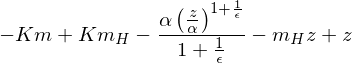

In [14]:
# 1) Isolate c in the budget constraint (this is done already, but to make sure, we run this line of code).
budget_constraint_high_solve = sm.solve(budget_constraint_high_sub, c)

# 2) Define that we want the budget constraint substituted into the utility function.
utility_high_sub = utility.subs(c, budget_constraint_high_solve[0])

# 3) Ensure that the utility function is correct after the substitution. 
utility_high_sub

We differentiate the utility function with respect to taxable income in order to derive the optimal level of taxable income. 

In [15]:
# 1) Define that we want to calculate the derivate of the utility function with respect to taxable income.
foc_high = sm.diff(utility_high_sub, z)

# 2) Define that we want to isolate for taxable income to derive z*.
z_star_high = sm.solve(foc_high, z)

# 3) Define the optimal level of taxable income as a Python-function. 
z_star_func_high = sm.lambdify((m_H, alp, eps), z_star_high)

# 4) Examine the optimal level of taxable income.
z_star_high

We denote this level of optimal taxable income as $z_{high} ^*$. We note that this is the same optimal taxable income as in section 3.1 besides the marginal tax rate. However, it is not possible in this function to show that high-income earners tend to earn an income which is identical to the threshold. This is called "bunching" since people tend to bunch at kink points. If it people with an income above the threshold that $z_{high}^*<K$ and $z^*>K$ then people will bunch at the kink. This is possible to show in a graphical analysis. 

## Graphical analysis

In this section we will analyse the behavior of the worker grahpically. First, we will find the maxmimum utility of the worker. 

In [37]:
# 1) Define a function that return the maximum utility level given alpha, epsilon, low tax rate, high tax rate and the threshold
def value_of_choice_2(alpha, epsilon, tax_low, tax_high, kink):
    
    # 1.1) If the alpha is below the income threshold, the maximum utility is found using the old budget constraint without the tax rate for high income earners
    if alpha < kink:
        global z_opt_new
        z_opt_new = (alpha*(1-tax_low)**epsilon)
        utility_f = (1-tax_low)*(alpha*(1-tax_low)**epsilon) - alpha/(1+1/epsilon)*(alpha*(1-tax_low)**epsilon/alpha)**(1+1/epsilon)
        return utility_f
    
    # 1.2) Find the maximum utility if alpha is above the threshold
    if alpha >= kink:
        
        # 1.3) Find the utility for the budget constaint only below the threshold
        utility_l = (1-tax_low)*(alpha*(1-tax_low)**epsilon) - alpha/(1+1/epsilon)*(alpha*(1-tax_low)**epsilon/alpha)**(1+1/epsilon)
        z_opt_low = (alpha*(1-tax_low)**epsilon)
        
        # 1.4) If the optimal income earned on the low budget set is above the threshold the low utility should be evaluated in the threshold
        if alpha*(1-tax_low)**epsilon>kink:
            utility_l = (1-tax_low)*kink - alpha/(1+1/epsilon)*(kink/alpha)**(1+1/epsilon)
            z_opt_low = kink
            
        # 1.5) Find the utility for the budget constaint only above the threshold
        utility_h = (1-tax_low)*kink+(1-tax_high)*(alpha*(1-tax_high)**epsilon-kink) - alpha/(1+1/epsilon)*(alpha*(1-tax_high)**epsilon/alpha)**(1+1/epsilon)
        z_opt_high = (alpha*(1-tax_high)**epsilon)
        
        # 1.4) If the optimal income earned on the high budget set is below the threshold the high utility should be evaluated in the threshold
        if alpha*(1-tax_high)**epsilon<kink:
            utility_h = (1-tax_low)*kink - alpha/(1+1/epsilon)*(kink/alpha)**(1+1/epsilon)
            z_opt_high = kink
        utility_g = max(utility_l, utility_h)
        if utility_g==utility_l:
            z_opt_new=z_opt_low
        else:
            z_opt_new=z_opt_high
        return utility_g

# 2) Define the indifference curve
def indif_curve(budget_con, alpha, epsilon, tax_low, tax_high, k):
    u = value_of_choice_2(alpha, epsilon, tax_low, tax_high, k)
    return u + alpha/(1+1/epsilon)*(budget_con/alpha)**(1+1/epsilon)


# 3) Define a function that makes a plot with the indifference curve, the budget constraint and the optimal behaviour.
def graph(alpha, epsilon, tax_low, tax_high, kink):
    plt.figure(figsize=(12,6))
    budget_con = np.arange(0.0, alpha*1.1+100, 1)
    plt.plot(budget_con, indif_curve(budget_con, alpha, epsilon, tax_low, tax_high, kink))
    
    lower = np.arange(0.0, kink, 1)
    plt.plot(lower, lower*(1-tax_low))
    
    upper = np.arange(kink, alpha*1.1+100, 1)
    plt.plot(upper, (1-tax_low)*kink+(upper-kink)*(1-tax_high))
    
    print("The optimal taxable income is: "+str(round(z_opt_new)))
    plt.plot(z_opt_new, utility_function(z_opt_new, alpha, epsilon, tax_low, tax_high, kink), 'ro')
    plt.ylabel('Consumption')
    plt.xlabel('Taxable income')
    plt.legend(['Indifference curve','Budget constraint (low marginal tax)', 'Budget constraint (high marginal tax)', 'Optimum'])
    return    

# 4) Plot the graph with interactive widgets 
widgets.interact(graph,
    alpha=(10,2000,10), epsilon=(0.01,1.0,0.01), tax_low=(0.0,1,0.01), tax_high=(0.1,1,0.01), kink=(10,1000,10)
);

interactive(children=(IntSlider(value=1000, description='alpha', max=2000, min=10, step=10), FloatSlider(value…

We note some of the same results as in the conclusion in section 3.2. In this extended model, we note that people with a potential income slightly above the threshold will bunch at the kink. This is due to the fact that people are unwilling to work at the high marginal tax rate, but will like to work at the low marginal tax rate. Thus, they maximize their utility by having a taxable income exactly equal to the threshold. 

# Conclusion

In this project, we have examined how people react to changes in the marginal tax rate. We have found that a larger marginal tax rate and a higher elasticity affect the labor supply negatively in a proportional tax system. This is shown analytically and by a graph, where one can change the parameter values.

Most Western countries apply a progressive tax system, where high-income earners face a greater marginal tax rate. We show analyticcaly that initial top tax payers only are affected by the largest marginal tax rate. We have shown in the graph that people will tend to bunch at the kink, so they earn the highest possible income without having to pay the largest marginal tax rate. This is in line with the literature. 